In [31]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
/Users/sophiacofone/school_local/omnic_ml/win_loss/win_loss.md
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA


In [32]:
df = pd.read_csv('roles_alldf_prepro_data.csv')
df

,user_id,self_character,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,...,self_pre_spike_longest_gun_primary_judge,self_pre_spike_longest_gun_primary_marshal,self_pre_spike_longest_gun_primary_none,self_pre_spike_longest_gun_primary_odin,self_pre_spike_longest_gun_primary_operator,self_pre_spike_longest_gun_primary_phantom,self_pre_spike_longest_gun_primary_spectre,self_pre_spike_longest_gun_primary_stinger,self_pre_spike_longest_gun_primary_vandal,round_info_round_length
0,3807,2,0,0,178579,0,134795,0,0,1,...,0,0,1,0,0,0,0,0,0,43784
1,3807,2,1,257180,287772,0,208579,0,0,1,...,0,0,1,0,0,0,0,0,0,79193
2,3807,2,0,0,377967,1,317772,0,0,0,...,0,0,0,0,0,0,0,0,1,60195
3,3807,2,1,471764,487358,0,407967,0,2,0,...,0,0,0,0,0,0,0,0,1,79391
4,3807,2,1,540359,580547,0,517358,0,0,1,...,0,0,1,0,0,0,0,0,0,63189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28954,1018,0,1,1340413,1375064,1,1313681,0,0,0,...,0,0,1,0,0,0,0,0,0,61383
28955,1018,0,0,0,1439659,1,1405064,1,0,1,...,0,0,0,0,0,0,0,0,1,34595
28956,1018,0,0,0,1504595,1,1469659,2,0,1,...,0,0,1,0,0,0,0,0,0,34936
28957,1018,0,1,1562583,1600300,1,1534595,0,0,2,...,0,0,0,0,0,0,0,0,1,65705


In [33]:
df_copy = df.copy()
df_no_userid = df_copy.drop('user_id', axis=1)

df_no_chars = df_no_userid.copy()
columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally3_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally1_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally2_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('ally4_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent7_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent6_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent5_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent8_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

columns_to_drop = [col for col in df_no_chars.columns if col.startswith('opponent9_character')]
df_no_chars.drop(columns_to_drop, axis=1, inplace=True)

df_no_map = df_no_chars.copy()
columns_to_drop = [col for col in df_no_chars.columns if col.startswith('map_')]
df_no_map.drop(columns_to_drop, axis=1, inplace=True)
df_no_map

,self_character,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,ally3_post_spike_deaths,...,self_pre_spike_longest_gun_primary_judge,self_pre_spike_longest_gun_primary_marshal,self_pre_spike_longest_gun_primary_none,self_pre_spike_longest_gun_primary_odin,self_pre_spike_longest_gun_primary_operator,self_pre_spike_longest_gun_primary_phantom,self_pre_spike_longest_gun_primary_spectre,self_pre_spike_longest_gun_primary_stinger,self_pre_spike_longest_gun_primary_vandal,round_info_round_length
0,2,0,0,178579,0,134795,0,0,1,0,...,0,0,1,0,0,0,0,0,0,43784
1,2,1,257180,287772,0,208579,0,0,1,0,...,0,0,1,0,0,0,0,0,0,79193
2,2,0,0,377967,1,317772,0,0,0,0,...,0,0,0,0,0,0,0,0,1,60195
3,2,1,471764,487358,0,407967,0,2,0,1,...,0,0,0,0,0,0,0,0,1,79391
4,2,1,540359,580547,0,517358,0,0,1,0,...,0,0,1,0,0,0,0,0,0,63189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28954,0,1,1340413,1375064,1,1313681,0,0,0,2,...,0,0,1,0,0,0,0,0,0,61383
28955,0,0,0,1439659,1,1405064,1,0,1,0,...,0,0,0,0,0,0,0,0,1,34595
28956,0,0,0,1504595,1,1469659,2,0,1,0,...,0,0,1,0,0,0,0,0,0,34936
28957,0,1,1562583,1600300,1,1534595,0,0,2,0,...,0,0,0,0,0,0,0,0,1,65705


In [34]:
X = df_no_map.drop('self_character', axis=1)
y = df_no_map['self_character']

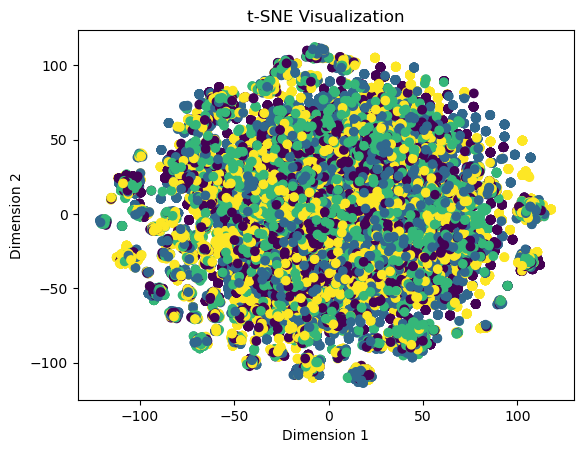

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(X)
X_embedded.shape

# Scatter plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

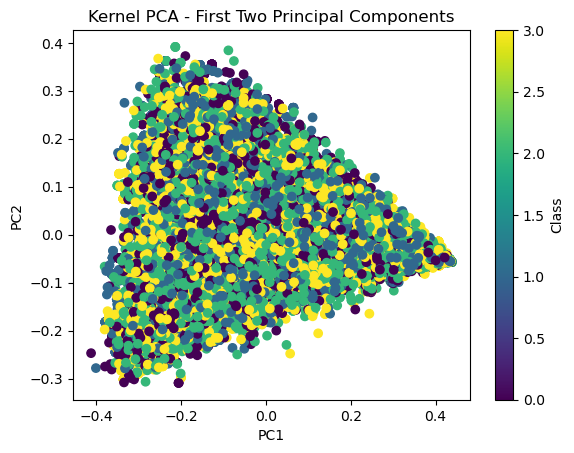

In [9]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()

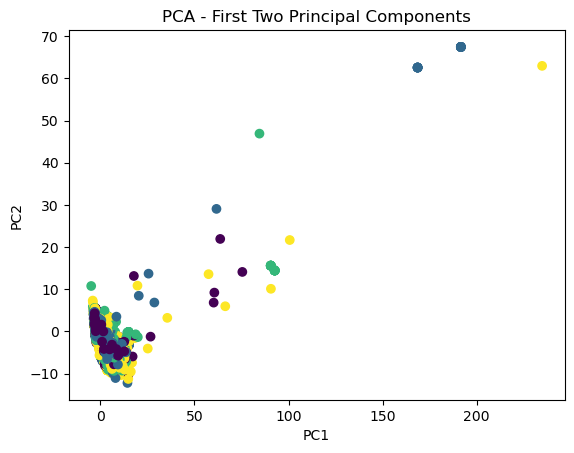

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.show()

In [18]:
df_no_map.columns[150:200]

Index(['ally1_pre_spike_total_health_loss',
       'ally1_post_spike_total_health_loss', 'ally2_pre_spike_avg_health',
       'ally2_post_spike_avg_health', 'ally2_pre_spike_max_health_loss',
       'ally2_post_spike_max_health_loss', 'ally2_pre_spike_total_health_loss',
       'ally2_post_spike_total_health_loss', 'self_pre_spike_avg_shield',
       'self_post_spike_avg_shield', 'self_pre_spike_max_shield_loss',
       'self_post_spike_max_shield_loss', 'self_pre_spike_total_shield_loss',
       'self_post_spike_total_shield_loss', 'self_pre_spike_avg_credits',
       'self_post_spike_avg_credits', 'self_pre_spike_max_credits_loss',
       'self_post_spike_max_credits_loss', 'self_pre_spike_total_credits_loss',
       'self_post_spike_total_credits_loss', 'self_pre_spike_avg_ammo_mag',
       'self_post_spike_avg_ammo_mag', 'self_pre_spike_max_ammo_mag_loss',
       'self_post_spike_max_ammo_mag_loss',
       'self_pre_spike_total_ammo_mag_loss',
       'self_post_spike_total_ammo_mag

In [28]:
col_keep = ['self_character','self_pre_spike_total_ability_usage_3','pre_spike_information_used',
'pre_spike_damage_for_self_used','self_pre_spike_total_ability_usage_1','pre_spike_crowd_control_vision_used',
'pre_spike_shield_used','pre_spike_damage_for_team_used','pre_spike_crowd_control_mobility_used',
'self_pre_spike_total_ability_usage_2','pre_spike_healing_used','self_pre_spike_map_covered',
'pre_spike_crowd_control_general_used','ally1_pre_spike_total_health_loss','ally3_pre_spike_avg_health',
'self_pre_spike_avg_ammo_reserve','self_pre_spike_movement_metric','self_pre_spike_total_loadout_value_loss',
'self_pre_spike_total_ability_usage_4','ally1_pre_spike_avg_health','ally4_pre_spike_avg_health',
'self_pre_spike_max_loadout_value_loss','self_longest_inv_state_melee','self_pre_spike_avg_ammo_mag',
'ally2_pre_spike_avg_health','ally4_pre_spike_total_health_loss',
'ally3_pre_spike_total_health_loss',
'self_pre_spike_longest_inv_state_melee',
'ally2_pre_spike_total_health_loss',
'ally1_pre_spike_max_health_loss',
'post_spike_crowd_control_vision_used']

reduced_df = df_no_map.loc[:, col_keep].copy()

In [29]:
X = reduced_df.drop('self_character', axis=1)
y = reduced_df['self_character']

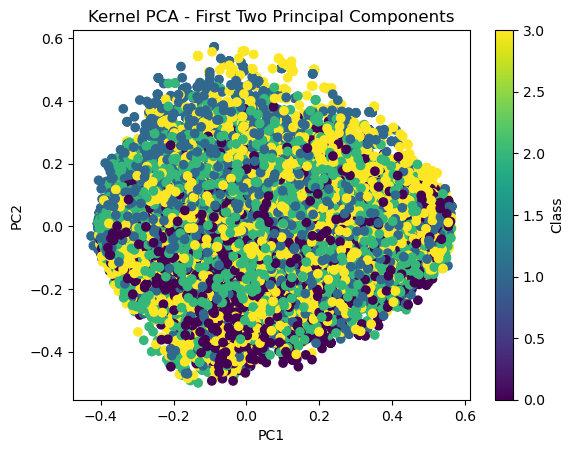

In [26]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()

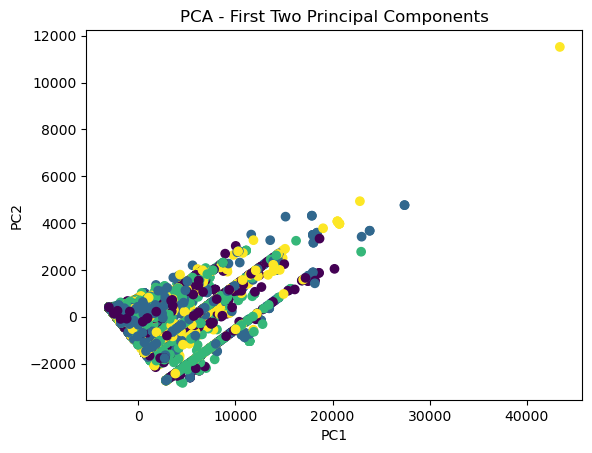

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.show()

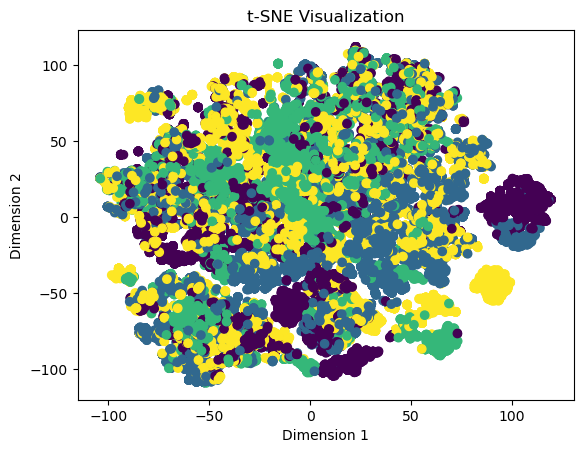

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(X)
X_embedded.shape

# Scatter plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

In [36]:
col_keep = ['self_character','self_pre_spike_total_ability_usage_3','pre_spike_information_used',
'pre_spike_damage_for_self_used','self_pre_spike_total_ability_usage_1','pre_spike_crowd_control_vision_used',
'pre_spike_shield_used','pre_spike_damage_for_team_used','pre_spike_crowd_control_mobility_used',
'self_pre_spike_total_ability_usage_2']

reduced_df_more = df_no_map.loc[:, col_keep].copy()

In [38]:
X = reduced_df_more.drop('self_character', axis=1)
y = reduced_df_more['self_character']

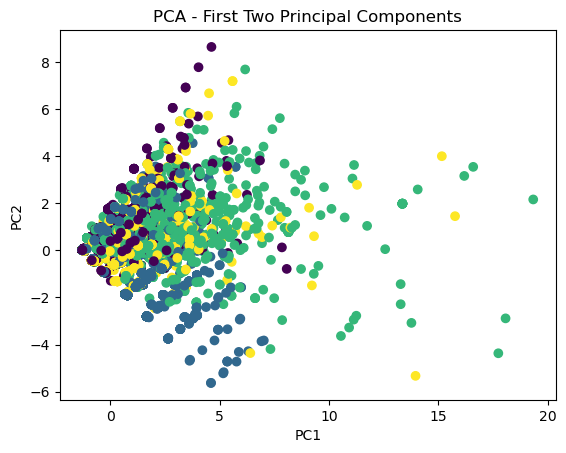

In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.show()

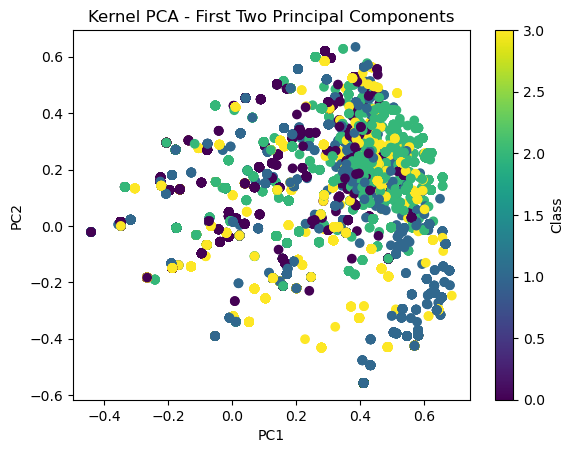

In [40]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()

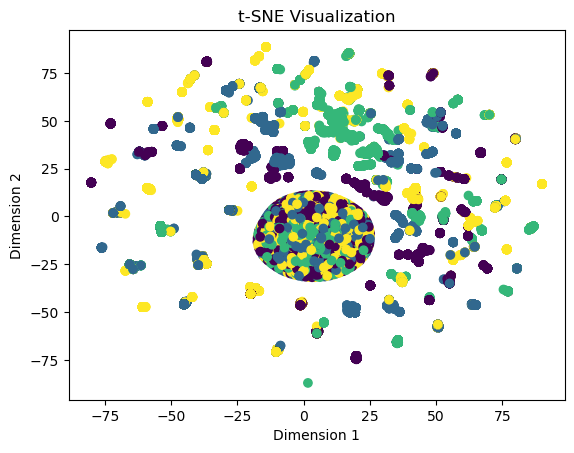

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(X)
X_embedded.shape

# Scatter plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()